In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from datetime import datetime

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("Sudan2013.xlsx")
dates = df['Dates']
totalHits=df['Total']
# check missing values
dates.isnull().sum()
totalHits.isnull().sum()

df.set_index('Dates', inplace=True) 
df.plot(figsize=(15, 6))
plt.show()


Illegal line #1
	"~/.matplotlib/matplotlibrc
"
	in file "/Users/bahareh/.matplotlib/matplotlibrc"


<Figure size 1500x600 with 1 Axes>

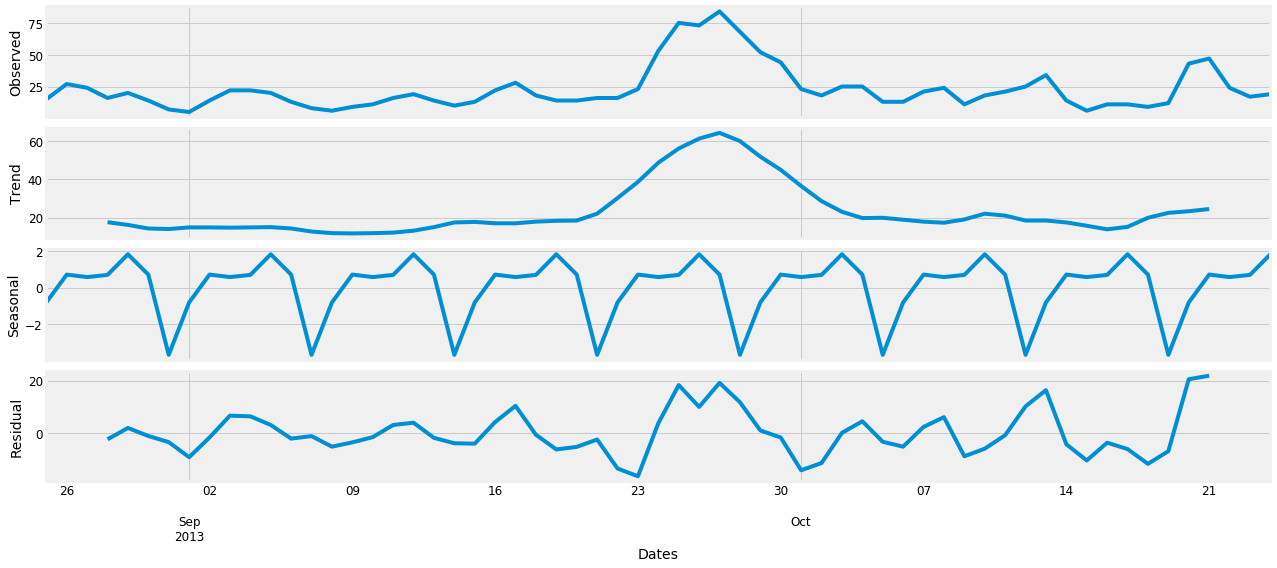

In [3]:
y=df

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/stat

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:576.471658636044
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:461.681514080073
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:458.1645503756585
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.47494988191266
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:458.8458369296203
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:437.84645539689564
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:351.08341009201246
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:333.13583959012783
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:499.188730669337
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:400.72706394165414
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:401.00072213393184
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.8281359476126
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:407.6704640145458
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:385.6147487926851
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:315.94804752740555
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:293.4620057598044
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:442.0329925031922
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:361.58678701711455
ARIMA

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/Users/bahareh/.virtualenvs/InternetShutdownEnv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4516      0.298     -1.514      0.130      -1.036       0.133
ma.L1          0.8465      0.199      4.260      0.000       0.457       1.236
ar.S.L12      -0.6223      0.188     -3.319      0.001      -0.990      -0.255
sigma2       161.0641     37.882      4.252      0.000      86.818     235.311


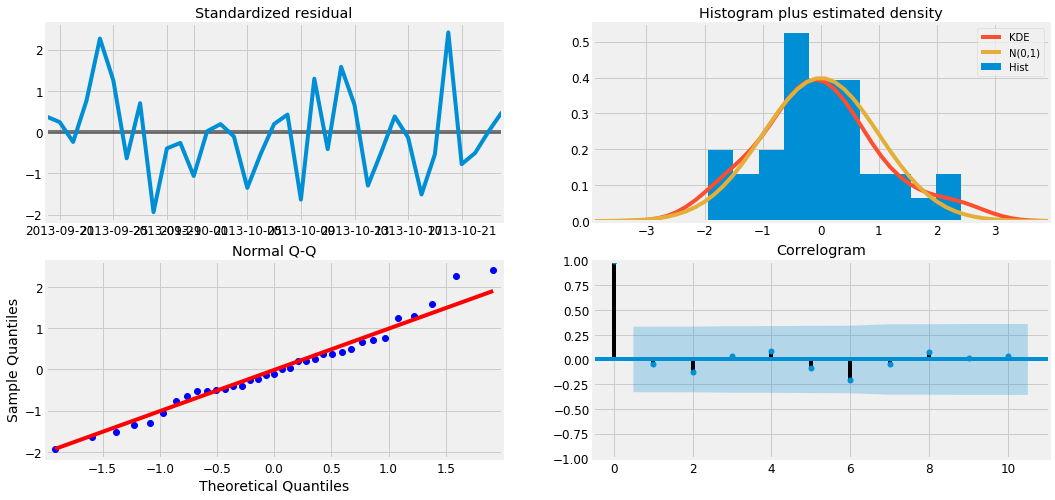

In [8]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

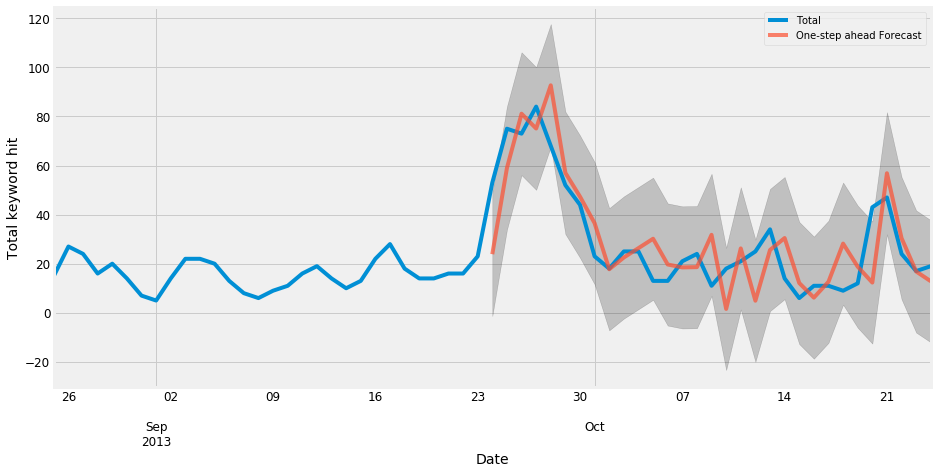

In [9]:
# Prediction
pred = results.get_prediction(start=pd.to_datetime('2013-09-24'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013-08-25':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total keyword hit')
plt.legend()
plt.show()